# Introduction to Neural Networks with tensorflow

# what are neural networks?
### A neural network is nothing more than a bunch of neurons connected together. Here’s what a simple neural network might look like

## Building Blocks: Neurons

First, we have to talk about neurons, the basic unit of a neural network. A neuron takes inputs, does some math with them, and produces one output. Here’s what a 2-input neuron looks like:

![neuron with 2 inputs](https://victorzhou.com/a74a19dc0599aae11df7493c718abaf9/perceptron.svg)

3 things are happening here. First, each input is multiplied by a weight:
#### x1→x1∗w1x_1
#### x_1 * w_1x1​→x1​∗w1​ x2→x2∗w2x_2
#### x_2 * w_2x2​→x2​∗w2​

Next, all the weighted inputs are added together with a bias bbb:
#### (x1∗w1)+(x2∗w2)+b(x_1 * w_1) + (x_2 * w_2) + b(x1​∗w1​)+(x2​∗w2​)+b

Finally, the sum is passed through an activation function:
#### y=f(x1∗w1+x2∗w2+b)y = f(x_1 * w_1 + x_2 * w_2 + b)y=f(x1​∗w1​+x2​∗w2​+b)

## Combining Neurons into a Neural Network
![nn](https://victorzhou.com/77ed172fdef54ca1ffcfb0bba27ba334/network.svg)
![nn explaination](https://i.imgur.com/QD4RiMP.jpg)

## Backpropagation:

### Backpropagation is a supervised learning algorithm, for training Multi-layer Perceptrons (Artificial Neural Networks).
Why We Need Backpropagation?

While designing a Neural Network, in the beginning, we initialize weights with some random values or any variable for that fact.

Now obviously, we are not superhuman. So, it’s not necessary that whatever weight values we have selected will be correct, or it fits our model the best.

Okay, fine, we have selected some weight values in the beginning, but our model output is way different than our actual output i.e. the error value is huge.

Now, how will you reduce the error?

Basically, what we need to do, we need to somehow explain the model to change the parameters (weights), such that error becomes minimum.

Let’s put it in an another way, we need to train our model.


![example](https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2017/09/Training-A-Neural-Network-Backpropagation-Edureka-528x216.png)

![nn](https://miro.medium.com/max/1280/1*OIOg3wDym2fzNIgelpOdwQ.gif)

In [ ]:
## how many neural network types are there?
https://towardsdatascience.com/the-mostly-complete-chart-of-neural-networks-explained-3fb6f2367464

Steps for building model using TensorFlow

* Import required libraries
* Load the dataset for training and evaluation
* Analyze the dataset
* Normalize the dataset for inputting into CNN
* Build the CNN model
* Create the estimator
* Train the model
* Evaluate the model
* Improve the accuracy of the model

In [3]:
# importing our dependencies

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# DataPreprocessing
## Loading the dataset

## Here we will load the Fashion mnist dataset using the load_data() method.

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [6]:
labelNames = ["top", "trouser", "pullover", "dress", "coat",
	"sandal", "shirt", "sneaker", "bag", "ankle boot"]

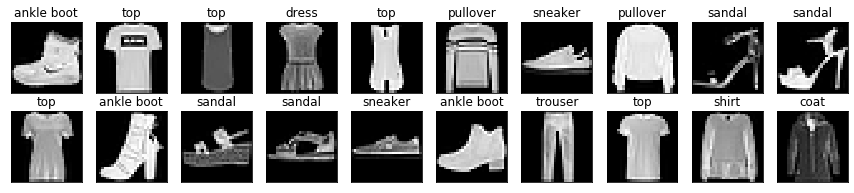

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(15,3))
for i in range(20):
 ax = fig.add_subplot(2,10, i+1, xticks=[], yticks=[])
 ax.imshow(np.squeeze(X_train[i]), cmap='gray')
 ax.set_title(labelNames[y_train[i]])

## Normalization

Here, we divide each image by the maximum number of pixels(255) so that the image range will be between 0 and 1. We normalize images so that our models train faster.

In [64]:
X_train = X_train/255.0
X_test = X_test/255.0

X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [67]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)
X_test.shape

(10000, 784)

## Building our model

The first thing we need to do before building a model is to create a model object itself, this object will be an instance of the class called Sequential.

In [72]:
model = tf.keras.models.Sequential([
   tf.keras.layers.Dense(units = 128, activation = 'relu', input_shape = (784,)),
    tf.keras.layers.Dropout(0.2),
   tf.keras.layers.Dense(units = 10, activation = 'softmax')
])

In [73]:
# compile the model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])
# model.summary()

In [99]:
model.summary()

Model: &quot;sequential_10&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [75]:
# train
history = model.fit(X_train, y_train, epochs =5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5305 - sparse_categorical_accuracy: 0.8108
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3974 - sparse_categorical_accuracy: 0.8565
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3667 - sparse_categorical_accuracy: 0.8663
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3483 - sparse_categorical_accuracy: 0.8719
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3297 - sparse_categorical_accuracy: 0.8782


In [76]:
# evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy: {accuracy*100}')

Accuracy: 87.07000017166138


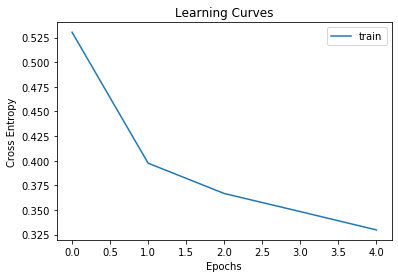

In [79]:

# ploting the learning curves
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

## Prediction

Predicted: dress


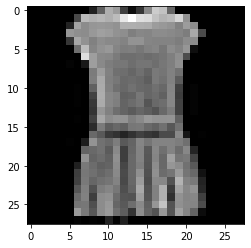

In [100]:
image = X_train[3].reshape(-1,28,28)
# lets display the image which we want to predict
plt.imshow(np.squeeze(image), cmap='gray')


# make a prediction
# reshaping the image for model input
image= image.reshape(-1,28*28)
# predicting the label of image
yhat = model.predict([image])
print('Predicted: {}'.format(labelNames[np.argmax(yhat)]))

## resources:
* https://towardsdatascience.com/the-mostly-complete-chart-of-neural-networks-explained-3fb6f2367464
* https://www.edureka.co/blog/backpropagation/
* https://towardsdatascience.com/simple-introduction-to-neural-networks-ac1d7c3d7a2c
* https://victorzhou.com/blog/intro-to-neural-networks/
* https://www.pyimagesearch.com/2019/02/11/fashion-mnist-with-keras-and-deep-learning/
